In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests 

In [12]:
deltaS_N2O4=304.376
deltaH_N2O4=9.079*1000
deltaS_NO2=240.034
deltaH_NO2=33.095*1000

T=298.15  #temperatura en kelvin
pt=1.0 #presion en barr
R=8.314 #J/K-mol



In [13]:
uN2O4_est=deltaH_N2O4-T*deltaS_N2O4
uNO2_est=deltaH_NO2-T*deltaS_NO2
print(uN2O4_est,uNO2_est)

-81670.70439999999 -38471.13709999999


In [14]:
x=np.arange(0.001,1,0.001)
n_N2O4=1-x
n_NO2=2*x
nt=1+x
X_N2O4=n_N2O4/nt
X_NO2=n_NO2/nt

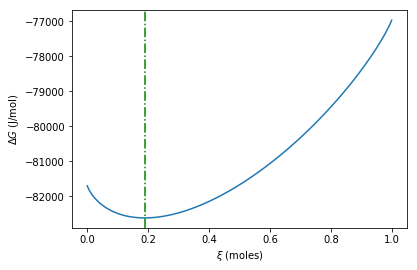

In [30]:
uN2O4=uN2O4_est+R*T*np.log(X_N2O4)
uNO2=uNO2_est+R*T*np.log(X_NO2)
uT=n_N2O4*uN2O4+n_NO2*uNO2
plt.plot(x,uT)
plt.xlabel(r'$\xi$ (moles)')
plt.ylabel(r'$\Delta G$ (J/mol)')
plt.axvline(x=xeq,color='green',linestyle="-.")
plt.show()

In [16]:
minimo=np.min(uT)
n=np.where(uT==minimo)
xeq=x[n]
print(xeq)

[0.189]


In [17]:
pNO2=2*xeq/(1+xeq)*pt
pN2O4=(1-xeq)/(1+xeq)*pt
Kp=pNO2**2/pN2O4
Kp

array([0.14817703])

[0.189]


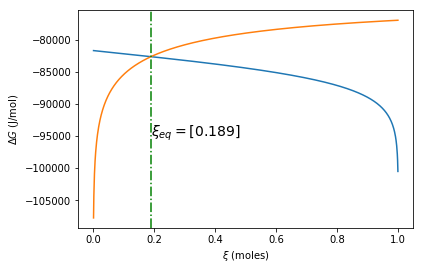

In [36]:
yy=(uN2O4-2*uNO2)**2
minimo=np.min(yy)
n=np.where(yy==minimo)
xeq=x[n]
print(xeq)
plt.plot(x,uN2O4)
plt.plot(x,2*uNO2)
plt.xlabel(r'$\xi$ (moles)')
plt.ylabel(r'$\Delta G$ (J/mol)')
plt.axvline(x=xeq,color='green',linestyle="-.")
plt.text(xeq,-95000,r'$\xi_{eq}=$'+str(xeq), fontsize=14)
plt.show()